In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, tree, linear_model, model_selection


<AxesSubplot: xlabel='feature_1', ylabel='feature_2'>

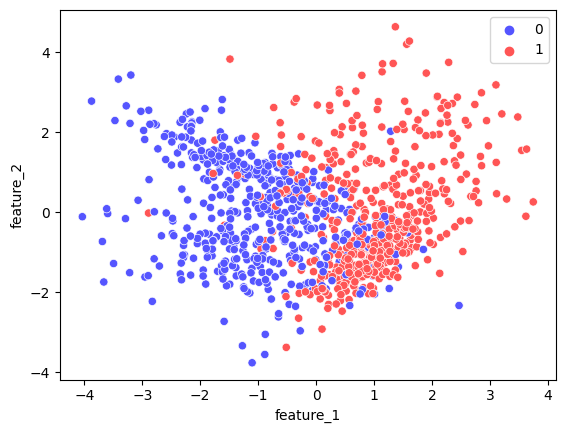

In [2]:
from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=1000,  # количество объектов
    n_features=2,  # количество признаков
    n_informative=2,  # количество информативных признаков
    n_redundant=0,  # количество неинформативных признаков
    n_classes=2,  # количество классов
    n_clusters_per_class=2,  # количество кластеров внутри класса
    random_state=1  # генератор случайных чисел
)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y, palette='seismic')


In [3]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy',  # критерий информативности
    max_depth=7,  # максимальная глубина
    min_samples_leaf=5,  # минимальное число объектов в листе
    class_weight='balanced',
    random_state=42,  # генератор случайных чисел
)

#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)

#Вычисляем координаты для построения кривой обучения
train_sizes, train_scores, valid_scores = model_selection.learning_curve(
    estimator=model,  # модель
    X=X,  # матрица наблюдений X
    y=y,  # вектор ответов y
    cv=skf,  # кросс-валидатор
    scoring='f1'  # метрика
)
print('Train sizes: \n', train_sizes)
print('Train scores: \n', train_scores)
print('Valid scores: \n', valid_scores)


Train sizes: 
 [ 80 260 440 620 800]
Train scores: 
 [[0.91489362 0.89473684 0.89473684 0.89473684 0.89473684]
 [0.89962825 0.91385768 0.91512915 0.91512915 0.91512915]
 [0.90153173 0.89519651 0.91938998 0.91416309 0.91416309]
 [0.90542636 0.90734824 0.92209857 0.90909091 0.9057187 ]
 [0.90794451 0.90012642 0.90813648 0.9041769  0.9081761 ]]
Valid scores: 
 [[0.78448276 0.77714286 0.75268817 0.8342246  0.83597884]
 [0.79069767 0.8172043  0.82352941 0.85436893 0.83902439]
 [0.87254902 0.82291667 0.81730769 0.85436893 0.85294118]
 [0.84210526 0.82795699 0.83168317 0.8195122  0.86138614]
 [0.86567164 0.87046632 0.82051282 0.83       0.86294416]]


In [4]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print('Train k-fold f1 scores',  train_scores_mean)
print('Valid k-fold f1 scores',  valid_scores_mean)


Train k-fold f1 scores [0.8987682  0.91177468 0.90888888 0.90993656 0.90571208]
Valid k-fold f1 scores [0.79690344 0.82496494 0.8440167  0.83652875 0.84991899]


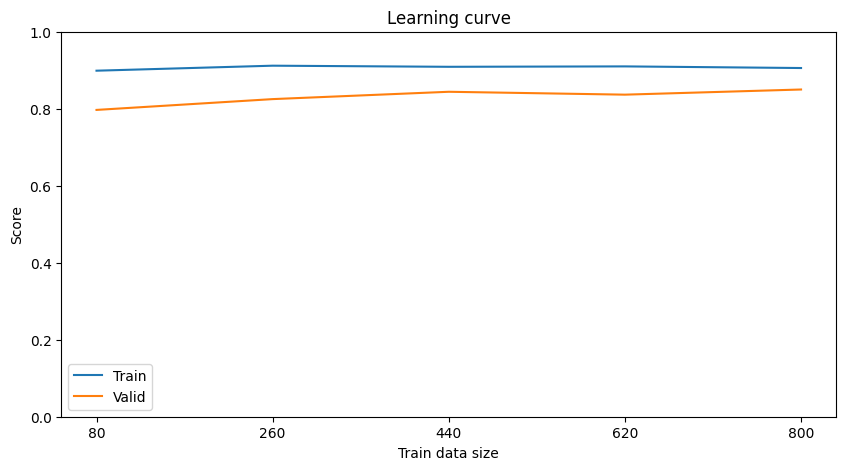

In [5]:
#Визуализируем кривую обучения
fig, ax = plt.subplots(figsize=(10, 5))  # фигура + координатная плоскость
#Строим кривую обучения по метрикам на тренировочных фолдах
ax.plot(train_sizes, train_scores_mean, label='Train')
#Строим кривую обучения по метрикам на валидационных фолдах
ax.plot(train_sizes, valid_scores_mean, label='Valid')
#Даём название графику и подписи осям
ax.set_title('Learning curve')
ax.set_xlabel('Train data size')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси абсцисс
ax.xaxis.set_ticks(train_sizes)
#Устаналиваем диапазон оси ординат
ax.set_ylim(0, 1)
#Отображаем легенду
ax.legend()


In [6]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        # фигура + координатная плоскость
        fig, ax = plt.subplots(figsize=(10, 4))
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title(f"Learning curve: {title}")
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()


In [9]:
#Создаём список из моделей
models = [
    linear_model.LogisticRegression(
        max_iter=1000,  # количество итераций на сходимость
        random_state=42,  # генератор случайных чисел
        class_weight='balanced'  # веса классов
    ),
    tree.DecisionTreeClassifier(
        criterion='entropy',  # критерий информативности
        max_depth=7,  # максимальная глубина
        min_samples_leaf=5,  # минимальное число объектов в листе
        random_state=42,  # генератор случайных чисел
        class_weight='balanced'  # веса классов
    ),
    tree.DecisionTreeClassifier(
        criterion='entropy',  # критерий информативности
        random_state=42,  # генератор случайных чисел
        class_weight='balanced'  # веса классов
    ),
]


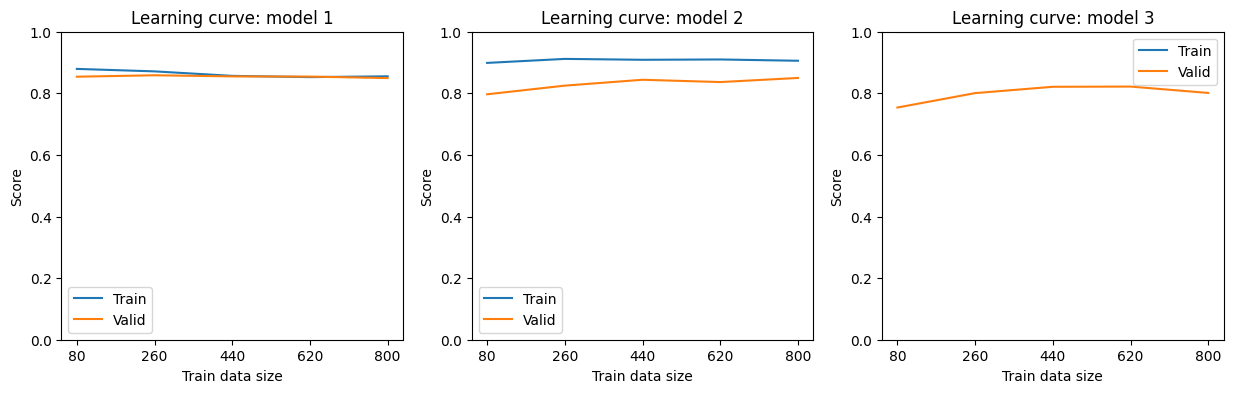

In [10]:
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Визуализируем кривые обучения
# фигура + три координатных плоскости
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
#Создаём цикл по списку моделей и индексам этого списка
for i, model in enumerate(models):  # i — текущий индекс, model — текущая модель
    plot_learning_curve(model, X, y, skf, ax=axes[i], title=f'model {i+1}')
